In [2]:
import pylab as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy import stats
import numpy as np

In [3]:
plt.close()

In [4]:
disk = "/home/jmk64/Desktop/CFC11_work/data/"
#disk = "/home/ptg21/"
antarctic = pd.read_csv(disk+"tco/antarctic_smoothed.csv",na_values=-999000000)
sh_mid_lats = pd.read_csv(disk+"tco/shmid_smoothed.csv",na_values=-999000000)
tropics = pd.read_csv(disk+"tco/tropics_smoothed.csv",na_values=-999000000)
nh_mid_lats = pd.read_csv(disk+"/tco/nhmid_smoothed.csv",na_values=-999000000)
arctic = pd.read_csv(disk+"/tco/arctic_smoothed.csv",na_values=-999000000)
globe = pd.read_csv(disk+"tco/global_smoothed.csv",na_values=-999000000)
total = pd.read_csv(disk+"tco/total_smoothed.csv",na_values=-999000000)

cumulative = pd.read_csv(disk+"cumulative_emissions_cl_data.csv")

In [5]:
CTM_cl = pd.read_csv(disk+"tco/CTM/dACC_burden.dat")
CTM_tco_r2000 = pd.read_csv(disk+"/tco/CTM/dR2000_CFC11.dat")
CTM_tco_r2000h = pd.read_csv(disk+"/tco/CTM/dR2000H_CFC11.dat")


In [6]:
CTM_tco_r2000h

,year,SHpol,SHmid,tropics,NHmid,NHpol,Global
0,2020,-0.0885,0.0246,-0.0163,-0.3702,-0.5710,-0.0815
1,2021,-0.0621,-0.0437,-0.0323,-0.1412,-0.2234,-0.0576
2,2022,-0.1036,-0.0662,-0.0328,-0.0908,-0.1406,-0.0524
3,2023,-0.1399,-0.0853,-0.0376,-0.0840,-0.1261,-0.0574
4,2024,-0.2880,-0.0842,-0.0158,-0.1388,-0.1908,-0.0556
5,2025,-0.2292,-0.1315,-0.0559,-0.1179,-0.1719,-0.0842
6,2026,-0.2896,-0.1629,-0.0686,-0.1444,-0.2121,-0.1044
7,2027,-0.3596,-0.1991,-0.0823,-0.1755,-0.2580,-0.1263
8,2028,-0.5433,-0.2176,-0.0672,-0.2520,-0.3604,-0.1374
9,2029,-0.5250,-0.2846,-0.1130,-0.2455,-0.3637,-0.1770


/home/ptg21/.conda/envs/basemap3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

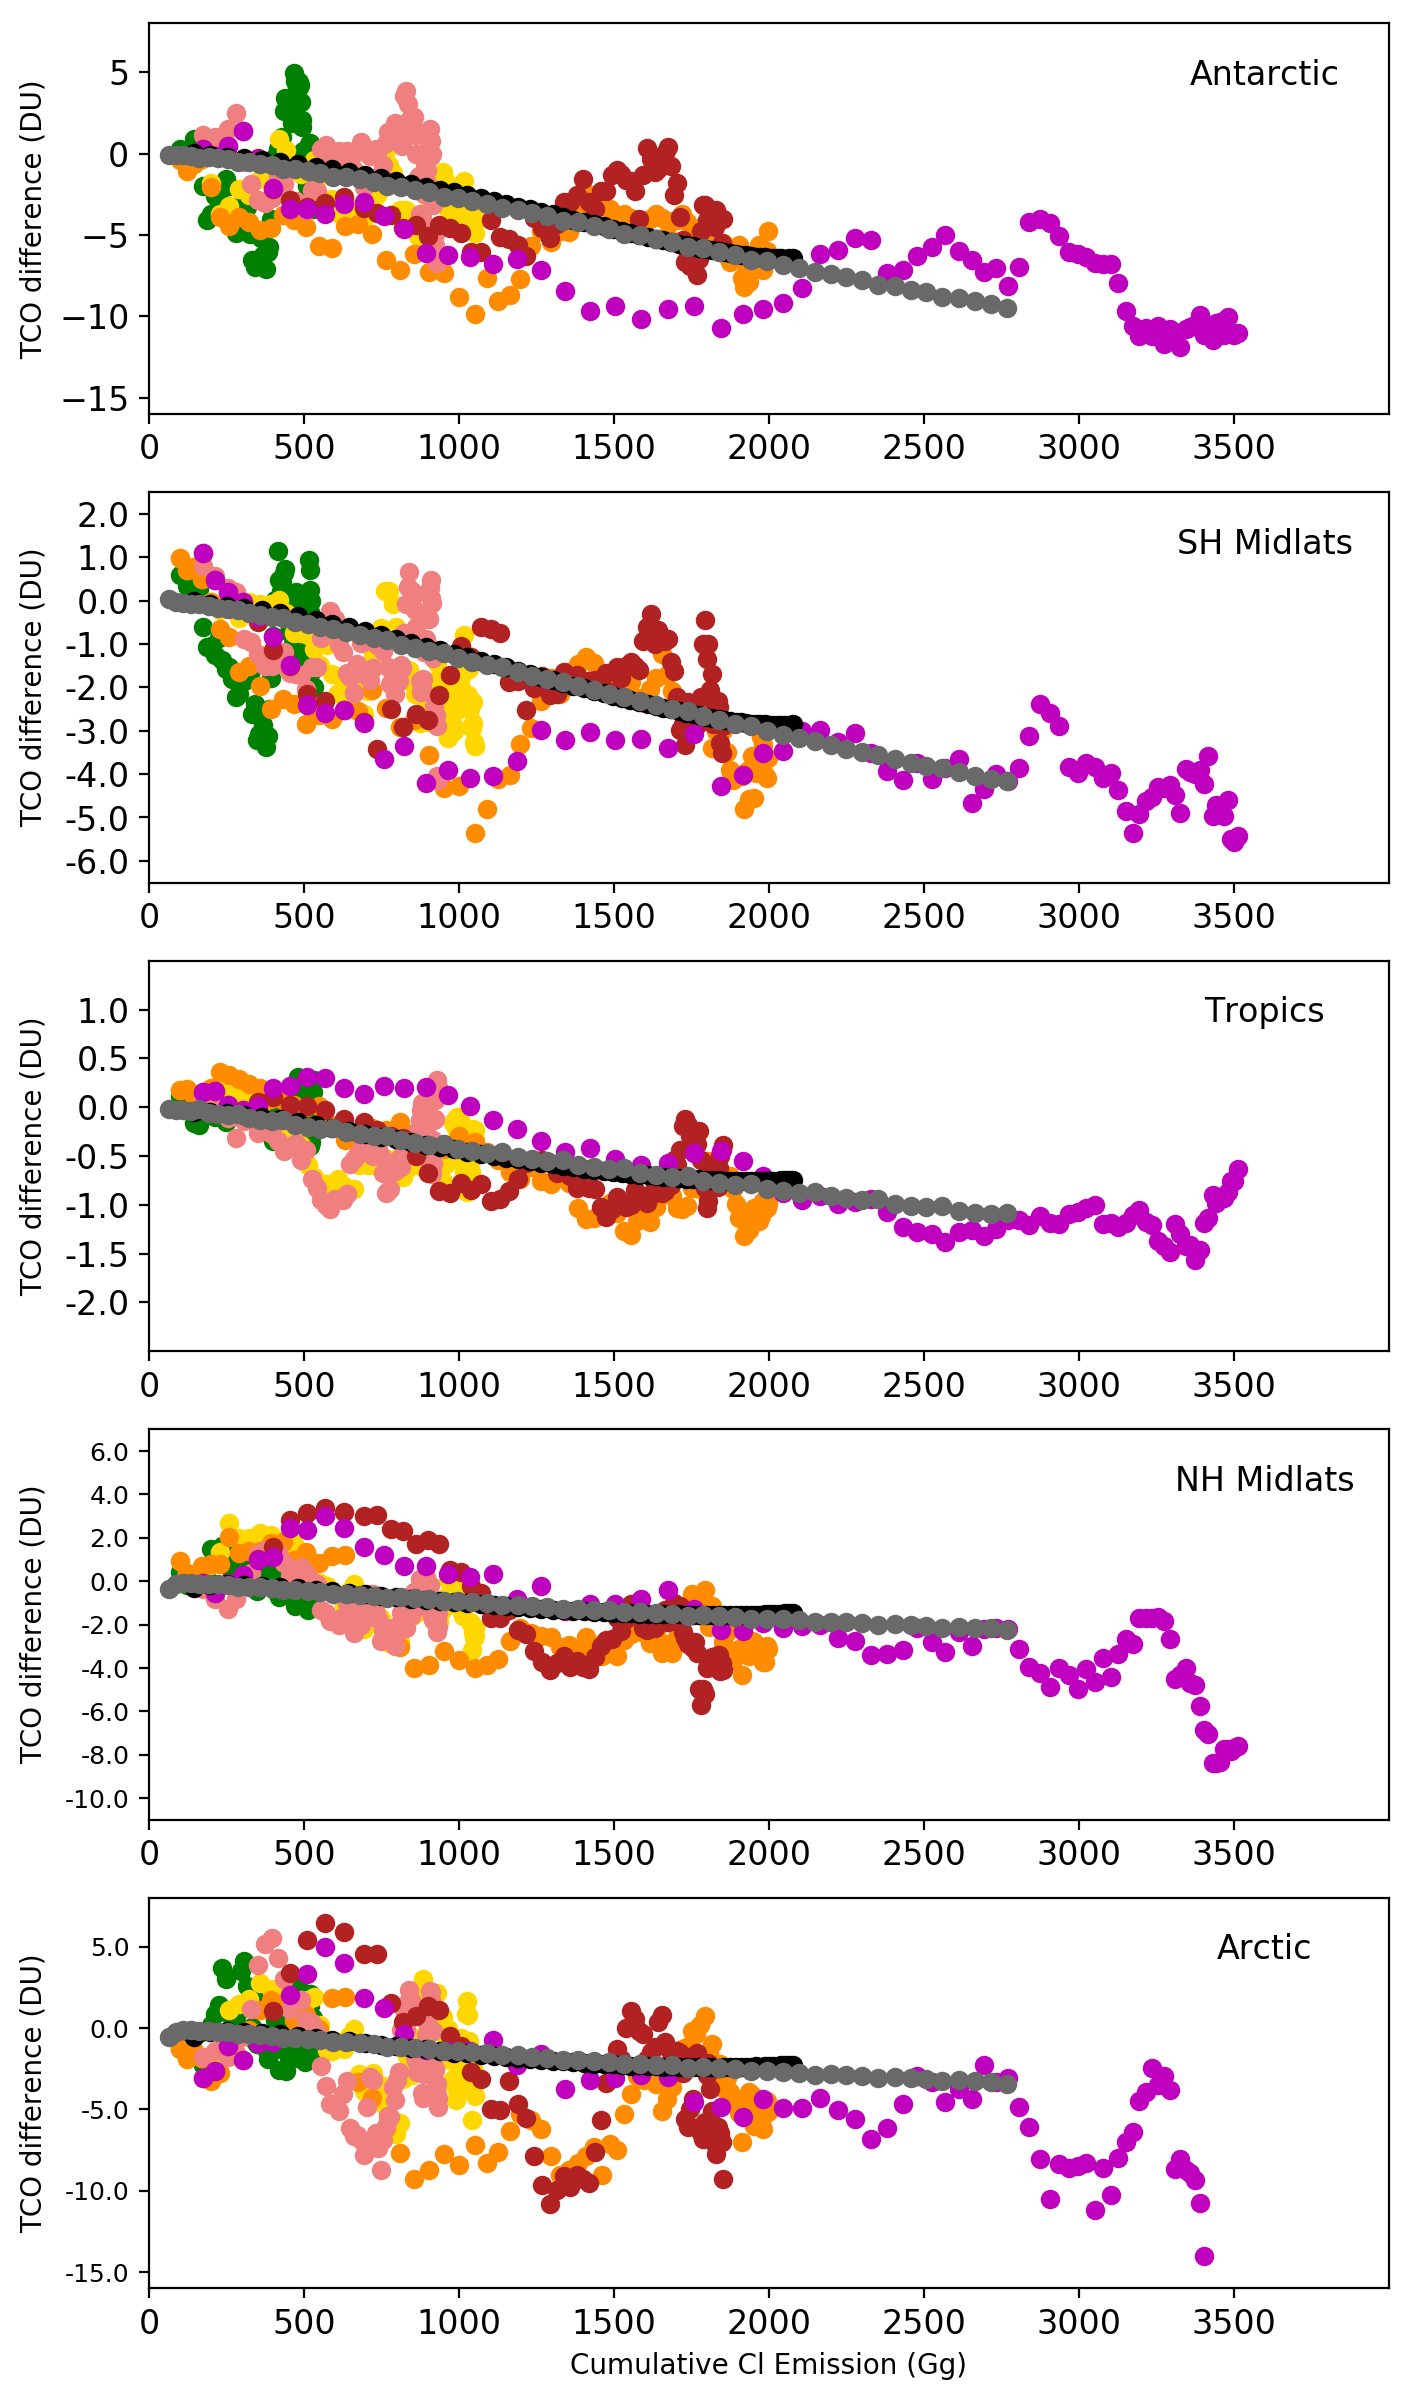

In [41]:
plt.clf()

#plt.figure(figsize=(8,15),dpi=200)

# make a new figure class
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(8,15), dpi=200)

labely = -1,0

from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FormatStrFormatter

plt.subplot(511)
#plt.plot(cumulative['SCEN1_7'][0:100], globe['SCEN1_7'][39:139]-globe['CCMI'][39:139], 'o', color='indigo', linewidth=2)
#plt.plot(cumulative['SCEN1_15'][0:100], globe['SCEN1_15'][39:1390]-globe['CCMI'][39:139], 'o', color='navy', linewidth=2)
#plt.plot(cumulative['SCEN1_30'][0:100], globe['SCEN1_30'][39:139]-globe['CCMI'][39:139], 'o', color='royalblue', linewidth=2)
plt.plot(cumulative['SCEN2_7'][0:100], antarctic['SCEN2_7'][39:139]-antarctic['CCMI'][39:139], 'o', color='green', linewidth=2)
plt.plot(cumulative['SCEN2_15'][0:100], antarctic['SCEN2_15'][39:139]-antarctic['CCMI'][39:139], 'o', color='gold', linewidth=2)
plt.plot(cumulative['SCEN2_30'][0:100], antarctic['SCEN2_30'][39:139]-antarctic['CCMI'][39:139], 'o', color='darkorange', linewidth=2)
plt.plot(cumulative['SCEN3_7'][0:100], antarctic['SCEN3_7'][39:139]-antarctic['CCMI'][39:139], 'o', color='lightcoral', linewidth=2)
plt.plot(cumulative['SCEN3_15'][0:100], antarctic['SCEN3_15'][39:139]-antarctic['CCMI'][39:139], 'o', color='firebrick', linewidth=2)
plt.plot(cumulative['SCEN3_30'][0:100], antarctic['SCEN3_30'][39:139]-antarctic['CCMI'][39:139], 'o', color='m', linewidth=2)

plt.plot(CTM_cl['dR2000']*0.77425, CTM_tco_r2000['SHpol'], 'o', color='black', linewidth=2)
plt.plot(CTM_cl['dR2000H']*0.77425, CTM_tco_r2000h['SHpol'], 'o', color='dimgrey', linewidth=2)

plt.tick_params(labelsize=12)
plt.xticks(np.arange(0,4000,500))
plt.xlim([0,4000])
plt.yticks(np.arange(-20,10,5))
plt.ylim([-16,8])
plt.ylabel('TCO difference (DU)',fontsize=10)
plt.subplot(5,1,1).set_title('Antarctic', y=0.8, x=0.9)

plt.subplot(512)
#plt.plot(cumulative['SCEN1_7'][0:100], globe['SCEN1_7'][39:139]-globe['CCMI'][39:139], 'o', color='indigo', linewidth=2)
#plt.plot(cumulative['SCEN1_15'][0:100], globe['SCEN1_15'][39:1390]-globe['CCMI'][39:139], 'o', color='navy', linewidth=2)
#plt.plot(cumulative['SCEN1_30'][0:100], globe['SCEN1_30'][39:139]-globe['CCMI'][39:139], 'o', color='royalblue', linewidth=2)
plt.plot(cumulative['SCEN2_7'][0:100], sh_mid_lats['SCEN2_7'][39:139]-sh_mid_lats['CCMI'][39:139], 'o', color='green', linewidth=2)
plt.plot(cumulative['SCEN2_15'][0:100], sh_mid_lats['SCEN2_15'][39:139]-sh_mid_lats['CCMI'][39:139], 'o', color='gold', linewidth=2)
plt.plot(cumulative['SCEN2_30'][0:100], sh_mid_lats['SCEN2_30'][39:139]-sh_mid_lats['CCMI'][39:139], 'o', color='darkorange', linewidth=2)
plt.plot(cumulative['SCEN3_7'][0:100], sh_mid_lats['SCEN3_7'][39:139]-sh_mid_lats['CCMI'][39:139], 'o', color='lightcoral', linewidth=2)
plt.plot(cumulative['SCEN3_15'][0:100], sh_mid_lats['SCEN3_15'][39:139]-sh_mid_lats['CCMI'][39:139], 'o', color='firebrick', linewidth=2)
plt.plot(cumulative['SCEN3_30'][0:100], sh_mid_lats['SCEN3_30'][39:139]-sh_mid_lats['CCMI'][39:139], 'o', color='m', linewidth=2)

plt.plot(CTM_cl['dR2000']*0.77425, CTM_tco_r2000['SHmid'], 'o', color='black', linewidth=2)
plt.plot(CTM_cl['dR2000H']*0.77425, CTM_tco_r2000h['SHmid'], 'o', color='dimgrey', linewidth=2)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.tick_params(labelsize=12)
plt.xticks(np.arange(0,4000,500))
plt.xlim([0,4000])
plt.yticks(np.arange(-8,3,1))
plt.ylim([-6.5,2.5])
plt.ylabel('TCO difference (DU)',fontsize=10)
plt.subplot(5,1,2).set_title('SH Midlats', y=0.8, x=0.9)


plt.subplot(513)
#plt.plot(cumulative['SCEN1_7'][0:100], globe['SCEN1_7'][39:139]-globe['CCMI'][39:139], 'o', color='indigo', linewidth=2)
#plt.plot(cumulative['SCEN1_15'][0:100], globe['SCEN1_15'][39:1390]-globe['CCMI'][39:139], 'o', color='navy', linewidth=2)
#plt.plot(cumulative['SCEN1_30'][0:100], globe['SCEN1_30'][39:139]-globe['CCMI'][39:139], 'o', color='royalblue', linewidth=2)
plt.plot(cumulative['SCEN2_7'][0:100], tropics['SCEN2_7'][39:139]-tropics['CCMI'][39:139], 'o', color='green', linewidth=2)
plt.plot(cumulative['SCEN2_15'][0:100], tropics['SCEN2_15'][39:139]-tropics['CCMI'][39:139], 'o', color='gold', linewidth=2)
plt.plot(cumulative['SCEN2_30'][0:100], tropics['SCEN2_30'][39:139]-tropics['CCMI'][39:139], 'o', color='darkorange', linewidth=2)
plt.plot(cumulative['SCEN3_7'][0:100], tropics['SCEN3_7'][39:139]-tropics['CCMI'][39:139], 'o', color='lightcoral', linewidth=2)
plt.plot(cumulative['SCEN3_15'][0:100], tropics['SCEN3_15'][39:139]-tropics['CCMI'][39:139], 'o', color='firebrick', linewidth=2)
plt.plot(cumulative['SCEN3_30'][0:100], tropics['SCEN3_30'][39:139]-tropics['CCMI'][39:139], 'o', color='m', linewidth=2)

plt.plot(CTM_cl['dR2000']*0.77425, CTM_tco_r2000['tropics'], 'o', color='black', linewidth=2)
plt.plot(CTM_cl['dR2000H']*0.77425, CTM_tco_r2000h['tropics'], 'o', color='dimgrey', linewidth=2)


plt.tick_params(labelsize=12)
plt.xticks(np.arange(0,4000,500))
plt.xlim([0,4000])
plt.yticks(np.arange(-2,1.5,0.5))
plt.ylim([-2.5,1.5])
plt.ylabel('TCO difference (DU)',fontsize=10)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.subplot(5,1,3).set_title('Tropics', y=0.8, x=0.9)



plt.subplot(514)
#plt.plot(cumulative['SCEN1_7'][0:100], globe['SCEN1_7'][39:139]-globe['CCMI'][39:139], 'o', color='indigo', linewidth=2)
#plt.plot(cumulative['SCEN1_15'][0:100], globe['SCEN1_15'][39:1390]-globe['CCMI'][39:139], 'o', color='navy', linewidth=2)
#plt.plot(cumulative['SCEN1_30'][0:100], globe['SCEN1_30'][39:139]-globe['CCMI'][39:139], 'o', color='royalblue', linewidth=2)
plt.plot(cumulative['SCEN2_7'][0:100], nh_mid_lats['SCEN2_7'][39:139]-nh_mid_lats['CCMI'][39:139], 'o', color='green', linewidth=2)
plt.plot(cumulative['SCEN2_15'][0:100], nh_mid_lats['SCEN2_15'][39:139]-nh_mid_lats['CCMI'][39:139], 'o', color='gold', linewidth=2)
plt.plot(cumulative['SCEN2_30'][0:100], nh_mid_lats['SCEN2_30'][39:139]-nh_mid_lats['CCMI'][39:139], 'o', color='darkorange', linewidth=2)
plt.plot(cumulative['SCEN3_7'][0:100], nh_mid_lats['SCEN3_7'][39:139]-nh_mid_lats['CCMI'][39:139], 'o', color='lightcoral', linewidth=2)
plt.plot(cumulative['SCEN3_15'][0:100], nh_mid_lats['SCEN3_15'][39:139]-nh_mid_lats['CCMI'][39:139], 'o', color='firebrick', linewidth=2)
plt.plot(cumulative['SCEN3_30'][0:100], nh_mid_lats['SCEN3_30'][39:139]-nh_mid_lats['CCMI'][39:139], 'o', color='m', linewidth=2)

plt.plot(CTM_cl['dR2000']*0.77425, CTM_tco_r2000['NHmid'], 'o', color='black', linewidth=2)
plt.plot(CTM_cl['dR2000H']*0.77425, CTM_tco_r2000h['NHmid'], 'o', color='dimgrey', linewidth=2)


plt.tick_params(labelsize=12)
plt.xticks(np.arange(0,4000,500))
plt.xlim([0,4000])
plt.yticks(np.arange(-10,7,2), fontsize=9)
plt.ylim([-11,7])
plt.ylabel('TCO difference (DU)',fontsize=10)
plt.subplot(5,1,4).set_title('NH Midlats', y=0.8, x=0.9)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))



plt.subplot(515)
#plt.plot(cumulative['SCEN1_7'][0:100], globe['SCEN1_7'][39:139]-globe['CCMI'][39:139], 'o', color='indigo', linewidth=2)
#plt.plot(cumulative['SCEN1_15'][0:100], globe['SCEN1_15'][39:1390]-globe['CCMI'][39:139], 'o', color='navy', linewidth=2)
#plt.plot(cumulative['SCEN1_30'][0:100], globe['SCEN1_30'][39:139]-globe['CCMI'][39:139], 'o', color='royalblue', linewidth=2)
plt.plot(cumulative['SCEN2_7'][0:100], arctic['SCEN2_7'][39:139]-arctic['CCMI'][39:139], 'o', color='green', linewidth=2)
plt.plot(cumulative['SCEN2_15'][0:100], arctic['SCEN2_15'][39:139]-arctic['CCMI'][39:139], 'o', color='gold', linewidth=2)
plt.plot(cumulative['SCEN2_30'][0:100], arctic['SCEN2_30'][39:139]-arctic['CCMI'][39:139], 'o', color='darkorange', linewidth=2)
plt.plot(cumulative['SCEN3_7'][0:100], arctic['SCEN3_7'][39:139]-arctic['CCMI'][39:139], 'o', color='lightcoral', linewidth=2)
plt.plot(cumulative['SCEN3_15'][0:100], arctic['SCEN3_15'][39:139]-arctic['CCMI'][39:139], 'o', color='firebrick', linewidth=2)
plt.plot(cumulative['SCEN3_30'][0:100], arctic['SCEN3_30'][39:139]-arctic['CCMI'][39:139], 'o', color='m', linewidth=2)

plt.plot(CTM_cl['dR2000']*0.77425, CTM_tco_r2000['NHpol'], 'o', color='black', linewidth=2)
plt.plot(CTM_cl['dR2000H']*0.77425, CTM_tco_r2000h['NHpol'], 'o', color='dimgrey', linewidth=2)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.tick_params(labelsize=12)
plt.xticks(np.arange(0,4000,500))
plt.xlim([0,4000])
plt.yticks(np.arange(-20,10,5), fontsize=9)
plt.ylim([-16,8])

plt.xlabel('Cumulative Cl Emission (Gg)',fontsize=10)
plt.ylabel('TCO difference (DU)',fontsize=10)
plt.subplot(5,1,5).set_title('Arctic', y=0.8, x=0.9)
#YAxis.set_label_coords(-0.5,0.5)
fig.align_ylabels()

plt.show()

In [42]:
for colname in ['SCEN2_7','SCEN2_7']:
    print(cumulative[colname].head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: SCEN2_7, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: SCEN2_7, dtype: float64


In [43]:
for ivar, jvar in zip(['SCEN2_7','SCEN2_7'],['SCEN2_7','SCEN2_7']):
    print (ivar, jvar)

SCEN2_7 SCEN2_7
SCEN2_7 SCEN2_7


In [29]:
help(ax.yaxis.set_major_formatter)

Help on method set_major_formatter in module matplotlib.axis:

set_major_formatter(formatter) method of matplotlib.axis.YAxis instance
    Set the formatter of the major ticker
    
    ACCEPTS: A :class:`~matplotlib.ticker.Formatter` instance



In [ ]:
nrows=3
ncols=3

# regions=[[-90,-70],[-70,-50],[-50,-30],
#           [-30,-10],[-10,10], [10,30],
#           [30,50],[50,70], [70,90]]

regions = [[-70,-50], [70,90]]
subplotsarr=[]
nrows=0
ncols=1
# for ivar in range(0, nrows):
#     for jvar in range (0, ncols):
#         subplotsarr.append([ivar,jvar])
subplotsarr=[[0,0],[1,0]]

fig, axes = plt.subplots(1, 2, figsize=(12,6), dpi=300)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)

seasons=[[11,0,1],[2,3,4],[5,6,7],[8,9,10]] #DJF, MAM, JJA, SON
seasons_labels = ['DJF', 'MAM', 'JJA', 'SON']
labels = ['-70S to -50S', '70N to 90N']

for season, season_label in zip(seasons,seasons_labels):
    for region, subplotnum in zip(regions, subplotsarr):

#         lat, subset_by_lat = subset_by_region(bro_tot, lata, region)
#         season_mean = np.mean(subset_by_lat[season, :, :], axis=0)
#         season_mean = np.mean(season_mean, axis=1)
        ivart = subplotnum[0]
        jvart = subplotnum[1]

        # note that if you've got more than 1 row, you can use [ivart, jvart] but if there's
        # only one row, the second dimension has to be omitted [ivart, jvart] will fail
        # with insufficient indices error
        try:
            tempfig2 = axes[ivart, jvart].plot(season_mean[:, 0], hybrid_ht[:]/1e3, lw=4, label=season_label)
        except:
            tempfig2 = axes[ivart].plot(season_mean[:, 0], hybrid_ht[:]/1e3, lw=4, label=season_label)              

        plt.tight_layout()
        axes[ivart].set_ylim((0, 10))
        axes[ivart].set_xlim((-0.1,10))
        axes[ivart].legend(loc='best', fontsize=16)

        axes[ivart].set_ylabel('Height / km')
        axes[ivart].set_xlabel('BrO mixing ratio / pptv')
        # fix font sizes for axes in subplot
        for label in axes[ivart].get_xticklabels() + axes[ivart].get_yticklabels():
            label.set_fontsize(16)
            axes[ivart].xaxis.label.set_fontsize(22)
            axes[ivart].yaxis.label.set_fontsize(22)